**Gist:**

* There are 23023 articles in the data set with an average length of 1066 tokens
* from these articles, 89 contain the words "AI", "A.I.", "Artificial Intelligence", "Machine Learning", "Deep Learning" or "Neural Network". Therefore, we included articles containing the words 'Computer' and 'Algorithm'. This results in 1133 articles that contain at least one of these words.
* The average length of the articles in the subset is 1749 tokens

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
articles <- read.csv('dsjVoxArticles.tsv', sep="\t", row.names=NULL)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF in Zeichenkette”

In [4]:
head(articles)

title,author,category,published_date,updated_on,slug,blurb,body


In [5]:
summary(articles)

                                                                            title      
 Caroline Framke                                                               :    6  
 Democratic debate 2016 live stream: time, TV schedule, and how to watch online:    4  
 Tara Golshan                                                                  :    4  
 Andrew Prokop                                                                 :    3  
 Jeff Stein                                                                    :    3  
 Republican debate 2016 live stream: time, TV schedule, how to watch online    :    3  
 (Other)                                                                       :10594  
              author                  category                published_date 
 German Lopez    :1022   The Latest       :3255                      :   37  
 Matthew Yglesias: 716   Donald Trump     : 764   2016-07-13 12:00:03:    8  
 Dara Lind       : 554   Politics & Policy: 633   2017-01-28 2

In [6]:
nrow(articles)

[1] 10617

The summary shows that the articles in the data frames still contain html-tags, so I scrape them first. While scraping them, a few rows threw type errors. I catched the errors, and saved the texts that threw type errors in a separate tsv-file.

First, I look at the files that could be scraped succesfully:

In [1]:
articles_scraped <- read.csv('dsjVoxArticles_scraped.tsv', sep="\t", row.names=NULL)

In [8]:
nrow(articles_scraped)

[1] 23024

In [9]:
error_articles <- read.csv('errors_dsjVoxArticles_scraped.tsv', sep="\t", row.names=NULL)

In [10]:
nrow(error_articles)

[1] 23024

There are two interesting observations:

1. The dataframe with erraneous files contains as many rows than the dataframe without the erraneous files

2. The dataframe without preprocessing contains less rows than the preprocessed dataframes, and throws an error that says "EOF in String"

I checked the downloaded .tsv file, and it contains indeed 23023 rows, as much as the preprocessed files. Therefore, the original frame contained a string that broke the loading process, and this string was filtered out during scraping. So this problem is solved, and it does not make sense to investigate it further.

It also seems that each file threw a type error while scraping, hence the doubling of the texts in the data frame. The type error was something about float and integer. I don't think that this error affects the work later, so I just use the file with the scraped articles for the data analysis.

In [8]:
summary(articles_scraped)

       X        
 Min.   :    0  
 1st Qu.: 5756  
 Median :11512  
 Mean   :11512  
 3rd Qu.:17267  
 Max.   :23023  
                
                                                                            title      
 Republican debate 2016 live stream: time, TV schedule, how to watch online    :    7  
 Republican debate 2016: start time, schedule, and what to expect              :    6  
 Democratic debate 2016 live stream: time, TV schedule, and how to watch online:    5  
 Democratic debate 2016: start time, schedule, and what to expect              :    4  
 Democratic debate 2015 live stream: time, TV schedule, and how to watch online:    3  
 Democratic debate 2015: start time, schedule, and what to expect              :    3  
 (Other)                                                                       :22996  
              author                   category                 published_date 
 German Lopez    : 2243   The Latest       : 7152                      :   11  


The summary shows that all the html-tags are gone (as intended), but the substring '\\n' occurs often in the article. This is a substring that can be filtered out later, probably in the tokenization step.

Now I calculate the average length of the articles:

In [9]:
articles_scraped['length'] <- str_count(articles_scraped$body, pattern = " ")

In [12]:
summary(articles_scraped)

       X        
 Min.   :    0  
 1st Qu.: 5756  
 Median :11512  
 Mean   :11512  
 3rd Qu.:17267  
 Max.   :23023  
                
                                                                            title      
 Republican debate 2016 live stream: time, TV schedule, how to watch online    :    7  
 Republican debate 2016: start time, schedule, and what to expect              :    6  
 Democratic debate 2016 live stream: time, TV schedule, and how to watch online:    5  
 Democratic debate 2016: start time, schedule, and what to expect              :    4  
 Democratic debate 2015 live stream: time, TV schedule, and how to watch online:    3  
 Democratic debate 2015: start time, schedule, and what to expect              :    3  
 (Other)                                                                       :22996  
              author                   category                 published_date 
 German Lopez    : 2243   The Latest       : 7152                      :   11  


The average length of the articles is 1066 tokens.

The next step is to find out how many of these texts contain the words "Artificial Intelligence" or "AI". For this, I will search for matches with str_detect and regex.

In [4]:
ai_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,' AI '))

artificial_int_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,' artificial intelligence '))

a_i_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,' A\\.I\\. '))

art_int_upper <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,' Artificial Intelligence '))


In [18]:
nrow(ai_data)

[1] 49

In [20]:
nrow(artificial_int_data)

[1] 50

In [21]:
nrow(a_i_data)

[1] 6

In [22]:
nrow(art_int_upper)

[1] 3

In [39]:
ai_all <- bind_rows(ai_data, artificial_int_data, a_i_data, art_int_upper)
    

In [24]:
nrow(ai_all)

[1] 108

In [40]:
ai_all = distinct(ai_all)

nrow(ai_all)

[1] 82

82 articles are somehow related to Artificial Intelligence. To broaden the corpus a bit, I will look up if there are any articles that contain the words "Machine Learning", "Neural Networks", and "Deep Learning".

In [7]:
ml_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,regex('machine learning', ignore_case = T)))

nrow(ml_data)

[1] 23

In [8]:
nn_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,regex('neural network', ignore_case = T)))

nrow(nn_data)

[1] 10

In [9]:
deep_learning <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,regex('deep learning', ignore_case = T)))

nrow(deep_learning)

[1] 4

In [41]:
ai_all = bind_rows(ai_all, ml_data, nn_data, deep_learning)

ai_all = distinct(ai_all)

nrow(ai_all)

[1] 98

We now have sampled 98 articles that are somehow related to machine learning/AI. We have to broaden the range of words we search after because this are to less articles for this task.


In [25]:
summary(ai_all)

       X        
 Min.   :    1  
 1st Qu.: 5546  
 Median :11648  
 Mean   :11440  
 3rd Qu.:17354  
 Max.   :23012  
                
                                                                           title    
 Here's a list of aid groups working on the Ebola crisis â€” and how to donate:  2  
  Descender is the best new comic book of 2015                                :  1  
  The man who discovered Ebola on why this epidemic spiraled out of control   :  1  
 #Gamergate: Here's why everybody in the video game world is fighting         :  1  
 #NeverTrump and the coming schism in the Republican Party, explained         :  1  
 #WheresRey and the big Star Wars toy controversy, explained                  :  1  
 (Other)                                                                      :617  
              author                  category               published_date
 German Lopez    : 66   The Latest        :204   2015-07-09 11:00:02:  2   
 Julia Belluz    : 56   Politics

In [11]:
computer_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,regex('computer', ignore_case = T)))

nrow(computer_data)

[1] 964

In [12]:
algorithm_data <- select(articles_scraped, everything())%>%
    filter(str_detect(articles_scraped$body,regex('algorithm', ignore_case = T)))

nrow(algorithm_data)

[1] 177

In [42]:
ai_all = bind_rows(ai_all, computer_data, algorithm_data)

ai_all = distinct(ai_all)

nrow(ai_all)

[1] 1133

In [50]:
ai_all['length'] <- str_count(ai_all$body, pattern = " ")

summary(ai_all)

       X        
 Min.   :    9  
 1st Qu.: 5105  
 Median :10984  
 Mean   :11373  
 3rd Qu.:17995  
 Max.   :23022  
                
                                                                                            title     
 25 Super Bowl commercials that explain Super Bowl commercials                                 :   2  
  Descender is the best new comic book of 2015                                                 :   1  
  Report: The US has been hacking the hackers in North Korea for years                         :   1  
  What exactly is a microaggression?                                                           :   1  
 1 in 5 people say they change their political views due to social media                       :   1  
 10 Cloverfield Lane is a tension-filled thriller thatâ€™s worthy of the secrecy surrounding it:   1  
 (Other)                                                                                       :1126  
              author                  ca

The mean length of the articles in this subset is longer than in the overall dataset. The length of articles in the full dataset is 1066 tokens, in this subset, the average length is 1649 tokens.

In [41]:
titles = select(ai_all, 'title', 'category', 'published_date')

In [48]:
print(titles['title'])

                                                                                                                            title
1                                                        This Oxford professor thinks artificial intelligence will destroy us all
2                                                 Will artificial intelligence destroy humanity? Here are 5 reasons not to worry.
3                                                Person of Interest, CBSâ€™s techno-thriller, is the second coming of The X-Files
4                                                                                Elon Musk pledges $10 million to ward off Skynet
5                                                                                                 What is Paul Krugman afraid of?
6                                                                              Vox Sentences: Romney 2016 was fun while it lasted
7                                                                        These are the 12 

In [45]:
print(titles['published_date'])

          published_date
1    2014-08-19 11:00:06
2    2014-08-22 15:20:03
3    2014-09-24 19:00:02
4    2015-01-15 18:10:02
5    2014-12-29 14:00:03
6    2015-01-31 00:00:02
7    2015-02-19 19:00:03
8    2015-03-04 01:00:02
9    2015-03-04 15:20:02
10   2015-05-01 14:40:02
11   2015-05-02 15:40:01
12   2015-04-24 12:30:02
13   2015-07-29 00:00:02
14   2015-08-10 14:00:02
15   2015-08-12 17:40:01
16   2015-08-14 13:50:02
17   2015-09-11 13:30:02
18   2015-11-03 16:30:02
19   2015-12-02 17:00:01
20   2016-01-25 17:00:03
21   2016-02-24 13:30:02
22   2016-03-06 21:40:02
23   2016-02-12 14:30:02
24   2016-03-10 16:00:08
25   2016-03-30 17:20:02
26   2016-04-21 15:40:02
27   2016-04-30 13:00:02
28   2016-05-17 15:50:02
29   2016-05-22 19:00:25
30   2016-06-01 16:00:03
31   2016-06-20 13:50:02
32   2016-07-21 00:00:03
33   2016-09-28 13:40:03
34   2016-10-03 17:21:02
35   2016-10-05 18:40:02
36   2016-09-28 00:00:03
37   2016-10-05 17:40:09
38   2016-10-12 12:10:02
39   2016-10-17 12:50:03


In [14]:
#unique(titles['category'])

For the use of the data, stratified sampling would make sense, so I test here which bins work best.

Binning in years:

In [48]:
ai_all['year'] <- as.factor(str_sub(ai_all$published_date, start=0, end = 4))

head(ai_all$year)

[1] 2014 2014 2014 2015 2014 2015
Levels: 2014 2015 2016 2017

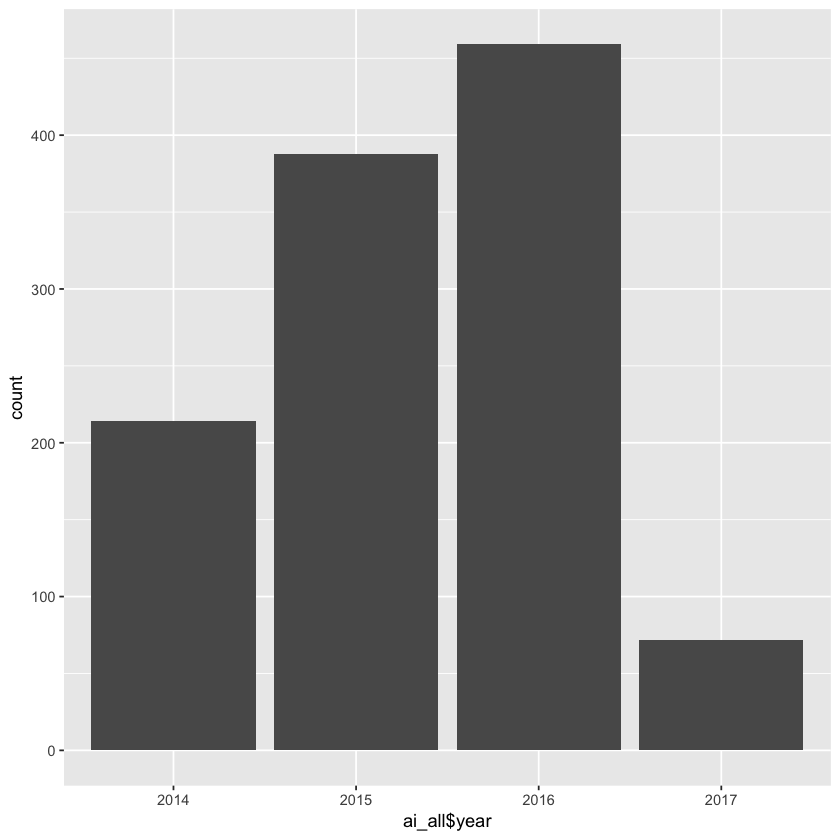

In [49]:
ggplot(ai_all, aes(x=ai_all$year)) + geom_bar()

Binning into months:

In [50]:
ai_all['month'] <- as.factor(str_sub(ai_all$published_date, start=0, end = 7))

head(ai_all$month)

[1] 2014-08 2014-08 2014-09 2015-01 2014-12 2015-01
36 Levels: 2014-04 2014-05 2014-06 2014-07 2014-08 2014-09 2014-10 ... 2017-03

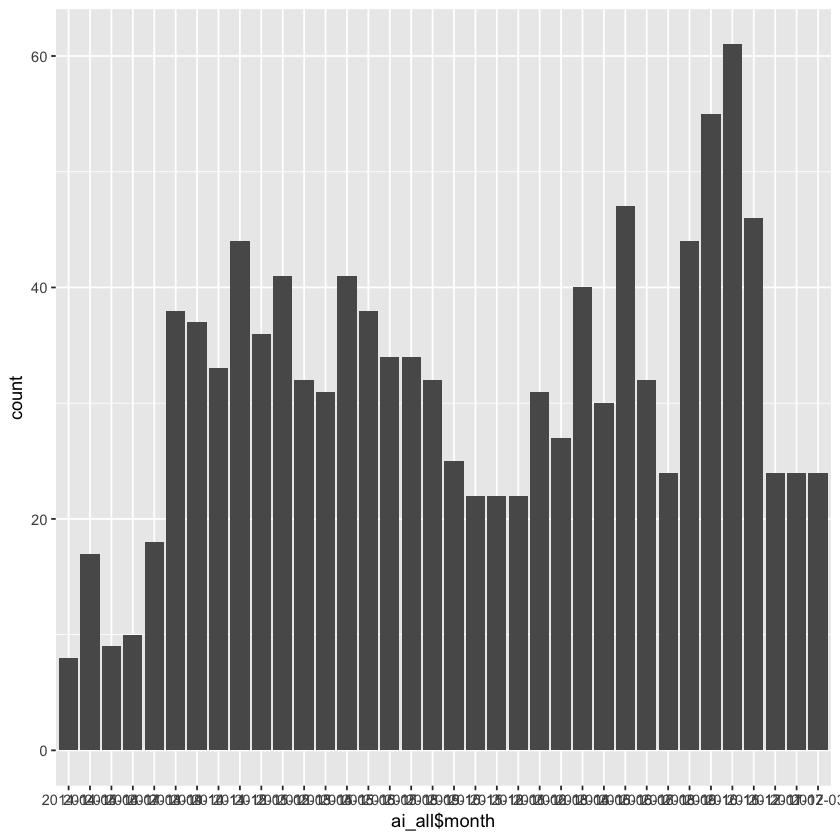

In [51]:
ggplot(ai_all, aes(x=ai_all$month)) + geom_bar()

There are only three months that have ten or less than ten texts, so using the months for stratified sampling seems to be a really good idea.

In [52]:
write.csv(ai_all, 'computer_subset.csv')